![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

**The FinanceToolkit** is an open-source toolkit in which all relevant financial ratios (50+), indicators and performance measurements are written down in the most simplistic way allowing for complete transparency of the calculation method. This allows you to not have to rely on metrics from other providers and, given a financial statement, allow for efficient manual calculations. This leads to one uniform method of calculation being applied that is available and understood by everyone.

## Table of Contents

1. [Installation](#installation)
2. [The Toolkit Module](#the-toolkit-module)
3. [The Ratios Module](#the-ratios-module)
4. [The Models Module](#the-models-module)
5. [Calling Functions Directly](#calling-functions-directly)

# Installation
To install the FinanceToolkit it simply requires the following:

```
pip install financetoolkit -U
```

From within Python use:

```python
from financetoolkit import Toolkit
```
 
The dependencies of the package are on purpose *very slim* so that it will work well with any combination of packages and not result in conflicts. I've also been careful with my selection in which I leave out functionality like technical analysis in which [ta-lib](https://ta-lib.org/) does an excellent job as well as portfolio attribution and optimisation in which [Riskfolio-lib](https://riskfolio-lib.readthedocs.io/en/latest/index.html) shines and lastly allow for any source to be incorporated to allow for the incorporation of data sources from [OpenBB](https://openbb.co/).

In [1]:
import pandas as pd
import numpy as np

from financetoolkit import Toolkit

API_KEY = "FINANCIAL_MODELING_PREP_API_KEY"

# The Toolkit Module

Initializing only is required once. This is the case for any function so once you have obtained a balance sheet statement, it will be stored accordingly which means that requests to FinancialModelingPrep, the source used in these examples, are kept to a minimum.

In [2]:
# Initialize the Toolkit with company tickers
companies = Toolkit(["AAPL", "MSFT", "GOOGL", "AMZN"], api_key=API_KEY)

Adj Close                                           Close  \
                  AAPL        AMZN       GOOGL        MSFT        AAPL   
Date                                                                     
2023-05-16  172.070007  113.400002  119.510002  311.059998  172.070007   
2023-05-17  172.690002  115.500000  120.839996  314.000000  172.690002   
2023-05-18  175.050003  118.150002  122.830002  318.519989  175.050003   
2023-05-19  175.160004  116.250000  122.760002  318.339996  175.160004   
2023-05-22  174.199997  115.010002  125.050003  321.179993  174.199997   
2023-05-23  171.559998  114.989998  122.559998  315.260010  171.559998   
2023-05-24  171.839996  116.750000  120.900002  313.850006  171.839996   
2023-05-25  172.990005  115.000000  123.480003  325.920013  172.990005   
2023-05-26  175.429993  120.110001  124.610001  332.890015  175.429993   
2023-05-30  177.300003  121.660004  123.669998  331.209991  177.300003   

                                                      High              ...  \
                  AMZN       GOOGL        MSFT        AAPL        AMZN  ...   
Date                                                                    ...   
2023-05-16  113.400002  119.510002  311.739990  173.139999  114.790001  ...   
2023-05-17  115.500000  120.839996  314.000000  172.929993  115.830002  ...   
2023-05-18  118.150002  122.830002  318.519989  175.240005  118.599998  ...   
2023-05-19  116.250000  122.760002  318.339996  176.389999  118.309998  ...   
2023-05-22  115.010002  125.050003  321.179993  174.710007  116.769997  ...   
2023-05-23  114.989998  122.559998  315.260010  173.380005  117.139999  ...   
2023-05-24  116.750000  120.900002  313.850006  172.419998  117.339996  ...   
2023-05-25  115.000000  123.480003  325.920013  173.899994  116.870003  ...   
2023-05-26  120.110001  124.610001  332.890015  175.770004  121.500000  ...   
2023-05-30  121.660004  123.669998  331.209991  178.990005  122.919998  ...   

                   Low                    Open                          \
                 GOOGL        MSFT        AAPL        AMZN       GOOGL   
Date                                                                     
2023-05-16  116.430000  309.829987  171.990005  111.050003  116.489998   
2023-05-17  118.889999  310.739990  171.710007  114.889999  119.610001   
2023-05-18  120.830002  313.720001  173.000000  116.690002  120.949997   
2023-05-19  122.150002  316.369995  176.389999  118.160004  123.550003   
2023-05-22  122.739998  318.010010  173.979996  116.769997  122.940002   
2023-05-23  122.209999  315.250000  173.130005  114.269997  124.160004   
2023-05-24  119.860001  312.609985  171.089996  115.349998  121.120003   
2023-05-25  121.959999  320.000000  172.410004  116.629997  124.519997   
2023-05-26  122.449997  323.880005  173.320007  116.040001  123.169998   
2023-05-30  122.000000  330.519989  176.960007  122.370003  125.639999   

                          Volume                                  
                  MSFT      AAPL      AMZN       GOOGL      MSFT  
Date                                                              
2023-05-16  309.829987  42110300  71472900  45035600.0  26730300  
2023-05-17  312.290009  57951600  65655200  33323600.0  24315000  
2023-05-18  314.529999  65496700  73174100  35234200.0  27276000  
2023-05-19  316.739990  55772400  54990200  41330300.0  27529500  
2023-05-22  318.600006  43570900  70741100  35253000.0  24115700  
2023-05-23  320.029999  50747300  67576300  34046300.0  30797200  
2023-05-24  314.730011  45143500  63487900  34182600.0  23384900  
2023-05-25  323.239990  56058300  66496700  42317000.0  43301700  
2023-05-26  324.019989  54794100  96681000  35613700.0  36600900  
2023-05-30  335.230011  55886200  64210500  35051200.0  29472500  

[10 rows x 24 columns]

Adj Close                                           Close              \
            AAPL        AMZN       GOOGL        MSFT        AAPL        AMZN   
Date                                                                           
2014   24.767366   15.517500   26.533001   40.351364   27.594999   15.517500   
2015   24.020947   33.794498   38.900501   49.507854   26.315001   33.794498   
2016   27.018864   37.493500   39.622501   56.972507   28.955000   37.493500   
2017   40.113384   58.473499   52.669998   80.177773   42.307499   58.473499   
2018   37.951183   75.098503   52.248001   96.850967   39.435001   75.098503   
2019   71.711731   92.391998   66.969498  152.596558   73.412498   92.391998   
2020  130.735306  162.846497   87.632004  217.502045  132.690002  162.846497   
2021  176.032730  166.716995  144.852005  331.640411  177.570007  166.716995   
2022  129.552719   84.000000   88.230003  238.699020  129.929993   84.000000   
2023  177.300003  121.660004  123.669998  331.209991  177.300003  121.660004   

                                    High              ...         Low  \
           GOOGL        MSFT        AAPL        AMZN  ...       GOOGL   
Date                                                  ...               
2014   26.533001   46.450001   28.282499   15.649000  ...   26.510000   
2015   38.900501   55.480000   26.757500   34.387501  ...   38.866001   
2016   39.622501   62.139999   29.299999   38.369999  ...   39.480999   
2017   52.669998   85.540001   42.647499   59.200001  ...   52.634998   
2018   52.248001  101.570000   39.840000   76.038002  ...   51.652000   
2019   66.969498  157.699997   73.419998   92.663002  ...   66.606499   
2020   87.632004  222.419998  134.740005  164.145996  ...   86.804497   
2021  144.852005  336.320007  179.229996  169.350006  ...  144.852005   
2022   88.230003  239.820007  129.949997   84.050003  ...   86.570000   
2023  123.669998  331.209991  178.990005  122.919998  ...  122.000000   

                        Open                                         Volume  \
            MSFT        AAPL        AMZN       GOOGL        MSFT       AAPL   
Date                                                                          
2014   46.450001   28.205000   15.577500   26.886999   46.730000  165613600   
2015   55.419998   26.752501   34.304001   39.390999   56.040001  163649200   
2016   62.029999   29.162500   38.323502   40.160500   62.959999  122345200   
2017   85.500000   42.630001   59.117500   52.774502   85.629997  103999600   
2018  100.440002   39.632500   75.540001   52.891499  101.290001  140014000   
2019  156.449997   72.482498   92.099998   66.789497  156.770004  100805600   
2020  219.679993  134.080002  163.750000   86.863503  221.699997   99116600   
2021  335.850006  178.089996  168.955994  146.050003  338.510010   64062300   
2022  236.660004  128.410004   83.120003   86.980003  238.210007   77034200   
2023  330.519989  176.960007  122.370003  125.639999  335.230011   55886200   

                                       
           AMZN       GOOGL      MSFT  
Date                                   
2014   40960000  24648000.0  21552500  
2015   74992000  32752000.0  27334100  
2016   82788000  34718000.0  25579900  
2017   53768000  23606000.0  18717400  
2018  139090000  33110000.0  33173800  
2019   50130000  19514000.0  18369400  
2020   59144000  21070000.0  20942100  
2021   47830000  18136000.0  18000800  
2022   62401200  23986300.0  21938500  
2023   64210500  35051200.0  29472500  

[10 rows x 24 columns]

<Axes: xlabel='Date'>

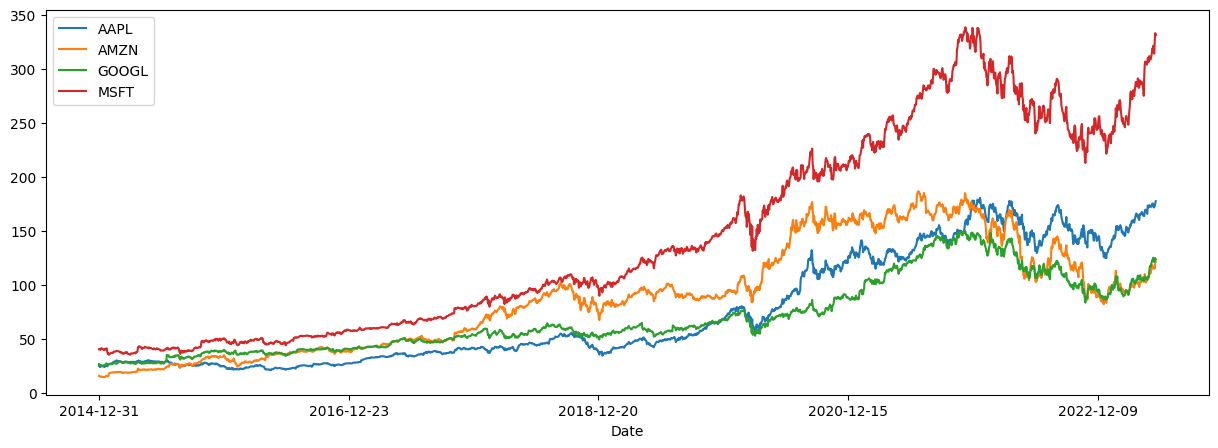

In [3]:
# Obtain daily historical data from each company
display(companies.get_historical_data(start="2000-01-01").tail(10))

# Obtain yearly historical data from each company
display(companies.get_historical_data(start="2010-01-01", period="yearly").tail(10))

# Plot the Adjusted Close Prices
companies.get_historical_data(start="2015-01-01")["Adj Close"].plot(figsize=(15, 5))

In [4]:
# Obtain the balance sheets from each company
companies.get_balance_sheet_statement()

date                                          2018          2019  \
AAPL Cash and Cash Equivalents         25913000000   48844000000   
     Short Term Investments            40388000000   51713000000   
     Cash and Short Term Investments   66301000000  100557000000   
     Accounts Receivable               48995000000   45804000000   
     Inventory                          3956000000    4106000000   
...                                            ...           ...   
MSFT Minority Interest                           0             0   
     Total Liabilities and Equity     258848000000  286556000000   
     Total Investments                123684000000  125112000000   
     Total Debt                        81808000000   78366000000   
     Net Debt                          69862000000   67010000000   

date                                          2020          2021          2022  
AAPL Cash and Cash Equivalents         38016000000   34940000000   23646000000  
     Short Term Investments            52927000000   27699000000   24658000000  
     Cash and Short Term Investments   90943000000   62639000000   48304000000  
     Accounts Receivable               37445000000   51506000000   60932000000  
     Inventory                          4061000000    6580000000    4946000000  
...                                            ...           ...           ...  
MSFT Minority Interest                           0             0             0  
     Total Liabilities and Equity     301311000000  333779000000  364840000000  
     Total Investments                125916000000  122094000000   97709000000  
     Total Debt                        70998000000   67775000000   61270000000  
     Net Debt                          57422000000   53551000000   47339000000  

[172 rows x 5 columns]

In [5]:
# Obtain the income statements from each company
companies.get_income_statement()

date                                            2018          2019  \
AAPL Revenue                            265595000000  260174000000   
     Cost of Goods Sold                 163756000000  161782000000   
     Gross Profit                       101839000000   98392000000   
     Gross Profit Ratio                     0.383437      0.378178   
     Research and Development Expenses   14236000000   16217000000   
...                                              ...           ...   
MSFT Net Income Ratio                       0.150154      0.311817   
     EPS                                        2.15          5.11   
     EPS Diluted                                2.13          5.06   
     Weighted Average Shares              7700000000    7673000000   
     Weighted Average Shares Diluted      7794000000    7753000000   

date                                            2020          2021  \
AAPL Revenue                            274515000000  365817000000   
     Cost of Goods Sold                 169559000000  212981000000   
     Gross Profit                       104956000000  152836000000   
     Gross Profit Ratio                     0.382332      0.417794   
     Research and Development Expenses   18752000000   21914000000   
...                                              ...           ...   
MSFT Net Income Ratio                       0.309625      0.364517   
     EPS                                        5.82          8.12   
     EPS Diluted                                5.76          8.05   
     Weighted Average Shares              7610000000    7547000000   
     Weighted Average Shares Diluted      7683000000    7608000000   

date                                            2022  
AAPL Revenue                            394328000000  
     Cost of Goods Sold                 223546000000  
     Gross Profit                       170782000000  
     Gross Profit Ratio                     0.433096  
     Research and Development Expenses   26251000000  
...                                              ...  
MSFT Net Income Ratio                       0.366863  
     EPS                                         9.7  
     EPS Diluted                                9.65  
     Weighted Average Shares              7496000000  
     Weighted Average Shares Diluted      7540000000  

[112 rows x 5 columns]

In [6]:
# Obtain the cash flow statements from each company
companies.get_cash_flow_statement()

date                                        2018          2019          2020  \
AAPL Net Income                      59531000000   55256000000   57411000000   
     Depreciation and Amortization   10903000000   12547000000   11056000000   
     Deferred Income Tax            -32590000000    -340000000    -215000000   
     Stock Based Compensation         5340000000    6068000000    6829000000   
     Change in Working Capital       34694000000   -3488000000    5690000000   
...                                          ...           ...           ...   
MSFT Cash End of Period              11946000000   11356000000   13576000000   
     Cash Beginning of Period         7663000000   11946000000   11356000000   
     Operating Cash Flow             43884000000   52185000000   60675000000   
     Capital Expenditure            -11632000000  -13925000000  -15441000000   
     Free Cash Flow                  32252000000   38260000000   45234000000   

date                                        2021          2022  
AAPL Net Income                      94680000000   99803000000  
     Depreciation and Amortization   11284000000   11104000000  
     Deferred Income Tax             -4774000000     895000000  
     Stock Based Compensation         7906000000    9038000000  
     Change in Working Capital       -4911000000    1200000000  
...                                          ...           ...  
MSFT Cash End of Period              14224000000   13931000000  
     Cash Beginning of Period        13576000000   14224000000  
     Operating Cash Flow             76740000000   89035000000  
     Capital Expenditure            -20622000000  -23886000000  
     Free Cash Flow                  56118000000   65149000000  

[120 rows x 5 columns]

With this structure, it is easy to select and plot specific companies, financial statement items and/or years. See some examples below.

date,2018,2019,2020,2021,2022
Cash and Cash Equivalents,31750000000,36092000000,42122000000,36220000000,53888000000
Short Term Investments,9500000000,18929000000,42274000000,59829000000,16138000000
Cash and Short Term Investments,41250000000,55021000000,84396000000,96049000000,70026000000
Accounts Receivable,16677000000,20816000000,24542000000,32891000000,42360000000
Inventory,17174000000,20497000000,23795000000,32640000000,34405000000


date,2018,2019,2020,2021,2022
AAPL,48995000000,45804000000,37445000000,51506000000,60932000000
AMZN,16677000000,20816000000,24542000000,32891000000,42360000000
GOOGL,21193000000,27492000000,31384000000,40270000000,40258000000
MSFT,26481000000,29524000000,32011000000,38043000000,44261000000


<Axes: >

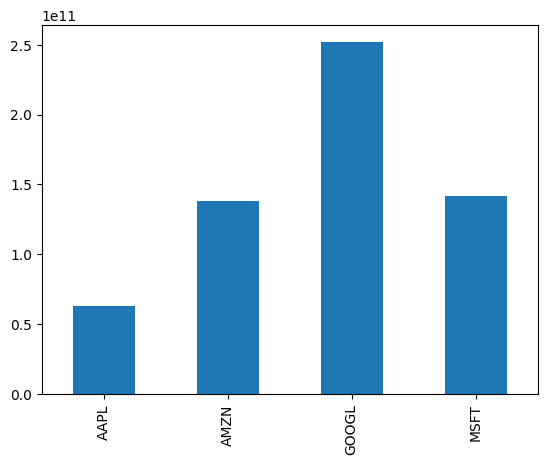

In [7]:
# Save to a variable for easier access
balance_sheet = companies.get_balance_sheet_statement()

# Show only the balance sheet statement for Amazon (purposely cut off to keep it compact)
display(balance_sheet.loc["AMZN"].head())

# Show the growth of the Accounts Receivable for each company
display(balance_sheet.loc[:, "Accounts Receivable", :])

# Plot the value of Total Shareholder Equity for each company in 2021
balance_sheet.loc[:, "Total Shareholder Equity", :][2021].plot(kind="bar")

There are several other functionalities within the `Toolkit` class which includes observing company profiles, company quotes, enterprise values and ratings. For example, after initialization you can call the functionality `get_profile`.

In [8]:
companies.get_profile()

,AAPL,MSFT,GOOGL,AMZN
symbol,AAPL,MSFT,GOOGL,AMZN
price,177.3,331.21,123.67,121.66
beta,1.296622,0.931034,1.100633,1.263194
volAvg,58217761,29426708,35680014,62403241
mktCap,2788698583757,2462708574008,1575024012940,1248280279572
lastDiv,0.96,2.72,0,0.2
range,124.17-178.99,213.43-335.74,83.34-126.43,81.43-146.57
changes,1.87,-1.68,-0.94,1.55
companyName,Apple Inc.,Microsoft Corporation,Alphabet Inc.,"Amazon.com, Inc."
currency,USD,USD,USD,USD


# The Ratios Module

After initialization of `Toolkit`, you can get access to the Ratios module which includes over 50 different ratios. This can be done by calling the `ratios` property.

In [9]:
ratios = companies.ratios

help(ratios)

Help on Ratios in module financetoolkit.base.ratios_controller object:

class Ratios(builtins.object)
 |  Ratios(tickers: str | list[str], historical: pandas.core.frame.DataFrame, balance: pandas.core.frame.DataFrame, income: pandas.core.frame.DataFrame, cash: pandas.core.frame.DataFrame)
 |  
 |  Ratios Controller Class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, tickers: str | list[str], historical: pandas.core.frame.DataFrame, balance: pandas.core.frame.DataFrame, income: pandas.core.frame.DataFrame, cash: pandas.core.frame.DataFrame)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  collect_all_ratios(self, include_dividends: bool = False, diluted: bool = True, days: int = 365)
 |      Calculates all Ratios based on the data provided.
 |  
 |  collect_efficiency_ratios(self, days: int = 365)
 |      Calculates all Efficiency Ratios based on the data provided.
 |  
 |  collect_liquidity_ratios(self)
 |      Calculates all Liquidity Ratios bas

Within this ratios module, the distinction is made between `collect_` and `get_`. The former obtains a collection of ratios (e.g. all solvency ratios) whereas the latter obtains a specific ratio.

In [10]:
ratios.collect_valuation_ratios()

date                                         2018          2019          2020  \
AAPL Earnings per Share (EPS)            2.976485      2.971447      3.275348   
     Revenue per Share (RPS)            13.279461      13.99112     15.661322   
     Price-to-Earnings (PE)             12.750335     24.133603     39.914937   
     Earnings per Share Growth                NaN     -0.001693      0.102274   
     Price-to-Earnings-Growth (PEG)      4.283689      8.121835     12.186472   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                         21.034979     26.956724     31.072864   
     EV-to-EBITDA                       18.198072     22.878262     26.286826   
     EV-to-Operating-Cash-Flow          18.793146     23.954989     28.487684   
     Tangible Asset Value             47035000000   60304000000   74953000000   
     Net Current Asset Value         111174000000  106132000000  109605000000   

date                                        2021         2022  
AAPL Earnings per Share (EPS)            5.61402       6.1132  
     Revenue per Share (RPS)           21.691002    24.153643  
     Price-to-Earnings (PE)            31.355912    21.192291  
     Earnings per Share Growth          0.714023     0.088917  
     Price-to-Earnings-Growth (PEG)     5.585286     3.466644  
...                                          ...          ...  
MSFT EV-to-EBIT                        35.081571    21.533588  
     EV-to-EBITDA                       31.57608    18.878505  
     EV-to-Operating-Cash-Flow         33.576639    20.746107  
     Tangible Asset Value            92277000000  99018000000  
     Net Current Asset Value         95749000000  74602000000  

[88 rows x 5 columns]

In [11]:
ratios.get_effective_tax_rate()

date,2018,2019,2020,2021,2022
AAPL,0.183422,0.159438,0.144282,0.133023,0.162045
AMZN,0.106296,0.169863,0.118413,0.12558,0.541947
GOOGL,0.11964,0.1333,0.162493,0.162023,0.159208
MSFT,0.545676,0.101813,0.165077,0.138266,0.131134


Some of these ratios also include optional fields depending on whether there is room for different methods of calculation. E.g. whether you'd like to have the diluted average shares included in the calculation.

In [12]:
ratios.collect_solvency_ratios(diluted=False)

date                                       2018       2019        2020  \
AAPL  Debt-to-Assets Ratio              0.31303   0.319178    0.347145   
      Debt-to-Equity Ratio             1.068467   1.194048     1.72081   
      Interest Coverage Ratio         25.247222  21.386186   26.920989   
      Debt Service Coverage Ratio      0.606661   0.604722    0.628966   
      Equity Multiplier                     NaN   3.563342    4.250894   
      Free Cash Flow Yield             0.085239   0.044463     0.03234   
      Net-Debt to EBITDA Ratio          1.08275   0.774128    0.962195   
      Cash Flow Coverage Ratio         0.085239   0.044463     0.03234   
      CAPEX Coverage Ratio             -5.81642  -6.611815  -11.037625   
      Dividend CAPEX Coverage Ratio   -2.865273  -2.819168   -3.771576   
AMZN  Debt-to-Assets Ratio              0.24462   0.280602    0.262734   
      Debt-to-Equity Ratio             0.913615    1.01845    0.903484   
      Interest Coverage Ratio         19.592096  23.353125   31.011536   
      Debt Service Coverage Ratio      0.181617   0.165592    0.181184   
      Equity Multiplier                     NaN   3.672945    3.514917   
      Free Cash Flow Yield             0.023646   0.023721    0.015919   
      Net-Debt to EBITDA Ratio         0.289496   0.725626    0.827532   
      Cash Flow Coverage Ratio         0.023646   0.023721    0.015919   
      CAPEX Coverage Ratio            -2.288151  -2.284206    -1.64584   
      Dividend CAPEX Coverage Ratio   -2.288151  -2.284206    -1.64584   
GOOGL Debt-to-Assets Ratio             0.017234   0.053525    0.078463   
      Debt-to-Equity Ratio             0.022587   0.073311    0.112688   
      Interest Coverage Ratio        310.140351     494.06  406.822222   
      Debt Service Coverage Ratio      0.760283   0.756971     0.72534   
      Equity Multiplier                     NaN   1.341971    1.404586   
      Free Cash Flow Yield             0.031435   0.033387    0.035905   
      Net-Debt to EBITDA Ratio        -0.358892  -0.075497   -0.025254   
      Cash Flow Coverage Ratio         0.031435   0.033387    0.035905   
      CAPEX Coverage Ratio             -1.90823  -2.315271   -2.922849   
      Dividend CAPEX Coverage Ratio    -1.90823  -2.315271   -2.922849   
MSFT  Debt-to-Assets Ratio             0.316046   0.273475     0.23563   
      Debt-to-Equity Ratio             0.988999   0.765816    0.600132   
      Interest Coverage Ratio         16.582144  20.342889   25.378232   
      Debt Service Coverage Ratio      0.599405   0.618827    0.732388   
      Equity Multiplier                     NaN   2.947365    2.664444   
      Free Cash Flow Yield             0.043248   0.032676    0.027329   
      Net-Debt to EBITDA Ratio         1.541561   1.226368    0.873272   
      Cash Flow Coverage Ratio         0.043248   0.032676    0.027329   
      CAPEX Coverage Ratio            -3.772696  -3.747576   -3.929473   
      Dividend CAPEX Coverage Ratio   -1.803625   -1.88149    -1.98427   

date                                       2021        2022  
AAPL  Debt-to-Assets Ratio             0.355323    0.340375  
      Debt-to-Equity Ratio             1.976843    2.369533  
      Interest Coverage Ratio         45.456711   44.538042  
      Debt Service Coverage Ratio      0.868251    0.775656  
      Equity Multiplier                5.254966    6.186222  
      Free Cash Flow Yield             0.031617    0.053047  
      Net-Debt to EBITDA Ratio         0.746708    0.738641  
      Cash Flow Coverage Ratio         0.031617    0.053047  
      CAPEX Coverage Ratio            -9.385476  -11.407452  
      Dividend CAPEX Coverage Ratio   -4.071619   -4.781048  
AMZN  Debt-to-Assets Ratio             0.276769    0.302843  
      Debt-to-Equity Ratio             0.841947     0.95943  
      Interest Coverage Ratio         41.048093   16.202788  
      Debt Service Coverage Ratio      0.280882   -0.022968  
      Equity Multiplier            

There is also an option to show all ratios if desired. Since each `collect` function depends on the `get` functions, these will always have the same result.

In [13]:
ratios.collect_all_ratios()

date                                                     2018          2019  \
AAPL Days of Inventory Outstanding (DIO)                  NaN       9.09443   
     Days of Sales Outstanding (DSO)                      NaN     66.497104   
     Operating Cycle (CC)                                 NaN     75.591533   
     Days of Accounts Payable Outstanding (DPO)           NaN    115.202124   
     Cash Conversion Cycle (CCC)                          NaN     -39.61059   
...                                                       ...           ...   
MSFT EV-to-EBIT                                     21.034979     26.956724   
     EV-to-EBITDA                                   18.198072     22.878262   
     EV-to-Operating-Cash-Flow                      18.793146     23.954989   
     Tangible Asset Value                         47035000000   60304000000   
     Net Current Asset Value                     111174000000  106132000000   

date                                                     2020         2021  \
AAPL Days of Inventory Outstanding (DIO)             8.790318     9.118102   
     Days of Sales Outstanding (DSO)                55.344672     44.37617   
     Operating Cycle (CC)                           64.134989    53.494272   
     Days of Accounts Payable Outstanding (DPO)     95.288896    83.168299   
     Cash Conversion Cycle (CCC)                   -31.153907   -29.674027   
...                                                       ...          ...   
MSFT EV-to-EBIT                                     31.072864    35.081571   
     EV-to-EBITDA                                   26.286826     31.57608   
     EV-to-Operating-Cash-Flow                      28.487684    33.576639   
     Tangible Asset Value                         74953000000  92277000000   
     Net Current Asset Value                     109605000000  95749000000   

date                                                    2022  
AAPL Days of Inventory Outstanding (DIO)            9.409674  
     Days of Sales Outstanding (DSO)               52.037733  
     Operating Cycle (CC)                          61.447407  
     Days of Accounts Payable Outstanding (DPO)    97.050428  
     Cash Conversion Cycle (CCC)                  -35.603021  
...                                                      ...  
MSFT EV-to-EBIT                                    21.533588  
     EV-to-EBITDA                                  18.878505  
     EV-to-Operating-Cash-Flow                     20.746107  
     Tangible Asset Value                        99018000000  
     Net Current Asset Value                     74602000000  

[268 rows x 5 columns]

# The Models Module

After initialization of `Toolkit`, you can get access to the Models module which includes a variety of well-known models. This can be done by calling the `models` property.

In [14]:
models = companies.models

It is possible to perform an (extended) Dupont analysis for each company.

In [15]:
models.get_dupont_analysis()

date                         2018      2019      2020      2021      2022
AAPL  Net Profit Margin  0.224142  0.212381  0.209136  0.258818  0.253096
      Asset Turnover          NaN  0.738878  0.828845  1.084079  1.120637
      Equity Multiplier       NaN  3.563342  4.250894  5.254966  6.186222
      Return on Equity        NaN  0.559172  0.736856  1.474433  1.754593
AMZN  Net Profit Margin  0.043253  0.041309  0.055252  0.071014  -0.00529
      Asset Turnover          NaN  1.446377  1.413007  1.266804  1.163879
      Equity Multiplier       NaN  3.672945  3.514917  3.202017  3.106793
      Return on Equity        NaN  0.219451  0.274417  0.288056 -0.019128
GOOGL Net Profit Margin  0.224647  0.212181  0.220619  0.295117  0.212038
      Asset Turnover          NaN  0.636354  0.612995  0.759002  0.780741
      Equity Multiplier       NaN  1.341971  1.404586  1.431704  1.426865
      Return on Equity        NaN  0.181196  0.189954  0.320693  0.236213
MSFT  Net Profit Margin  0.150154  0.311817  0.309625  0.364517  0.366863
      Asset Turnover          NaN  0.461467  0.486556  0.529336  0.567606
      Equity Multiplier       NaN  2.947365  2.664444  2.439914  2.264347
      Return on Equity        NaN  0.424106  0.401398  0.470787  0.471513

In [16]:
models.get_extended_dupont_analysis()

date                               2018      2019      2020      2021  \
AAPL  Interest Burden Ratio    0.972498  0.972512  0.988031  0.997638   
      Tax Burden Ratio         0.839671   0.86432  0.866084   0.86903   
      Operating Profit Margin  0.274489  0.252666  0.244398  0.298529   
      Asset Turnover                NaN  0.738878  0.828845  1.084079   
      Equity Multiplier             NaN  3.563342  4.250894  5.254966   
      Return on Equity              NaN  0.559172  0.736856  1.474433   
AMZN  Interest Burden Ratio     1.10301  1.040426  0.947101  1.047417   
      Tax Burden Ratio         0.810965  0.796919  0.931525  0.834935   
      Operating Profit Margin  0.048354  0.049821  0.062627  0.081203   
      Asset Turnover                NaN  1.446377  1.413007  1.266804   
      Equity Multiplier             NaN  3.672945  3.514917  3.202017   
      Return on Equity              NaN  0.219451  0.274417  0.288056   
GOOGL Interest Burden Ratio    0.753903  0.863874  0.857369  0.867525   
      Tax Burden Ratio         1.167737  1.003272  0.976834   0.96594   
      Operating Profit Margin  0.255177  0.244815  0.263424  0.352178   
      Asset Turnover                NaN  0.636354  0.612995  0.759002   
      Equity Multiplier             NaN  1.341971  1.404586  1.431704   
      Return on Equity              NaN  0.181196  0.189954  0.320693   
MSFT  Interest Burden Ratio    0.961178  0.983313  0.998548   0.98332   
      Tax Burden Ratio         0.472674  0.913429  0.836137  0.876352   
      Operating Profit Margin    0.3305  0.347163  0.370842  0.423005   
      Asset Turnover                NaN  0.461467  0.486556  0.529336   
      Equity Multiplier             NaN  2.947365  2.664444  2.439914   
      Return on Equity              NaN  0.424106  0.401398  0.470787   

date                               2022  
AAPL  Interest Burden Ratio    1.002804  
      Tax Burden Ratio         0.835612  
      Operating Profit Margin   0.30204  
      Asset Turnover           1.120637  
      Equity Multiplier        6.186222  
      Return on Equity         1.754593  
AMZN  Interest Burden Ratio    0.601247  
      Tax Burden Ratio         0.761838  
      Operating Profit Margin -0.011549  
      Asset Turnover           1.163879  
      Equity Multiplier        3.106793  
      Return on Equity        -0.019128  
GOOGL Interest Burden Ratio    1.049265  
      Tax Burden Ratio         0.801315  
      Operating Profit Margin  0.252189  
      Asset Turnover           0.780741  
      Equity Multiplier        1.426865  
      Return on Equity         0.236213  
MSFT  Interest Burden Ratio    0.996022  
      Tax Burden Ratio         0.872336  
      Operating Profit Margin  0.422232  
      Asset Turnover           0.567606  
      Equity Multiplier        2.264347  
      Return on Equity         0.471513

# Calling Functions Directly

While the `Toolkit` package itself is class-based, this doesn't mean that you are unable to call each functionality individually as well. This accepts virtually any input, from `np.array` to `pd.Series` and regular `floats`.

In [17]:
from financetoolkit.historical import price

price.get_sharpe_ratio(
    returns=np.array([0.09, 0.6, 0.075]), risk_free_rate=np.array([0.01, 0.03, 0.03])
)

price.get_sharpe_ratio(
    returns=pd.Series([0.10, 0.5, 0.075]), risk_free_rate=pd.Series([0.005, 0.02, 0.03])
)

price.get_sharpe_ratio(returns=pd.Series([0.08, 0.3, 0.025]), risk_free_rate=0.01)

0    0.481046
1    1.992904
2    0.103081
dtype: float64

It is also relatively straight forward to group a selection of ratios into one DataFrame.

In [18]:
from financetoolkit.ratios import (
    efficiency,
    liquidity,
    profitability,
    solvency,
    valuation,
)

# Note: this is dummy data, not actual data

asset_turnover = efficiency.get_asset_turnover_ratio(
    sales=pd.Series([100, 110, 120, 130, 80]),
    total_assets_begin=pd.Series([500, 400, 300, 200, 100]),
    total_assets_end=pd.Series([500, 430, 320, 200, 100]),
)

quick_ratio = liquidity.get_quick_ratio(
    cash_and_equivalents=pd.Series([100, 110, 120, 130, 80]),
    accounts_receivable=pd.Series([30, 20, 30, 20, 40]),
    marketable_securities=pd.Series([30, 10, 30, 20, 40]),
    current_liabilities=pd.Series([130, 120, 110, 150, 100]),
)

return_on_assets = profitability.get_return_on_assets(
    net_income=pd.Series([80, 40, 40, 30, 20]),
    total_assets=pd.Series([200, 300, 400, 500, 450]),
)

debt_to_assets = solvency.get_debt_to_assets_ratio(
    total_debt=pd.Series([100, 110, 120, 130, 80]),
    total_assets=pd.Series([200, 140, 160, 160, 300]),
)

price_to_earnings = valuation.get_price_earnings_ratio(
    stock_price=pd.Series([30, 11, 12, 10, 30]),
    earnings_per_share=pd.Series([0.5, 0.4, 0.1, 1.1, 1.2]),
)

components = {
    "Asset Turnover": asset_turnover,
    "Quick Ratio": quick_ratio,
    "Return on Assets": return_on_assets,
    "Debt to Assets": debt_to_assets,
    "Price to Earnings": price_to_earnings,
}


pd.DataFrame(components)

,Asset Turnover,Quick Ratio,Return on Assets,Debt to Assets,Price to Earnings
0,0.200000,1.230769,0.400000,0.500000,60.000000
1,0.265060,1.166667,0.133333,0.785714,27.500000
2,0.387097,1.636364,0.100000,0.750000,120.000000
3,0.650000,1.133333,0.060000,0.812500,9.090909
4,0.800000,1.600000,0.044444,0.266667,25.000000


This returns the following table which closely resembles the proper Dupont analysis for Apple at their given reporting dates in October.

In [19]:
from financetoolkit.models import dupont

years = [2018, 2019, 2020, 2021, 2022]

dupont.get_dupont_analysis(
    net_income=pd.Series(
        [59531000000, 55256000000, 57411000000, 94680000000, 99803000000], index=years
    ),
    total_revenue=pd.Series(
        [265595000000, 260174000000, 274515000000, 365817000000, 394328000000],
        index=years,
    ),
    total_assets_begin=pd.Series(
        [np.nan, 365725000000, 338516000000, 323888000000, 351002000000],
        index=years,
    ),
    total_assets_end=pd.Series(
        [365725000000, 338516000000, 323888000000, 351002000000, 352755000000],
        index=years,
    ),
    total_equity_begin=pd.Series(
        [np.nan, 107147000000, 90488000000, 65339000000, 63090000000], index=years
    ),
    total_equity_end=pd.Series(
        [107147000000, 90488000000, 65339000000, 63090000000, 50672000000], index=years
    ),
)

,2018,2019,2020,2021,2022
Net Profit Margin,0.224142,0.212381,0.209136,0.258818,0.253096
Asset Turnover,NaN,0.738878,0.828845,1.084079,1.120637
Equity Multiplier,NaN,3.563342,4.250894,5.254966,6.186222
Return on Equity,NaN,0.559172,0.736856,1.474433,1.754593
